In [1]:
import geopandas as gpd
import geoplot

import pandas as pd
from shapely.geometry import Point, Polygon
from geovoronoi import voronoi_regions_from_coords

import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import sys

In [2]:
weather_data_path = os.path.join('./data','nyc','weather','request_results.csv')
weather_data = pd.read_csv(weather_data_path)

In [3]:
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,16.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

In [5]:
stations = weather_data.drop_duplicates(keep='first', subset='STATION')

In [6]:
stations_geo = gpd.GeoDataFrame(
    stations, geometry=gpd.points_from_xy(stations.LONGITUDE, stations.LATITUDE))

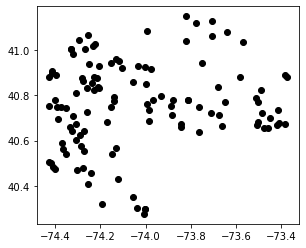

In [7]:
stations_geo.plot(color='black')
plt.show()

In [8]:
## For reference, I want to plot these on top of the council regions
council_footprints = gpd.read_file('./data/nyc/footprints/council_districts.geojson')

In [9]:
boroughs = gpd.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)

In [10]:
boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


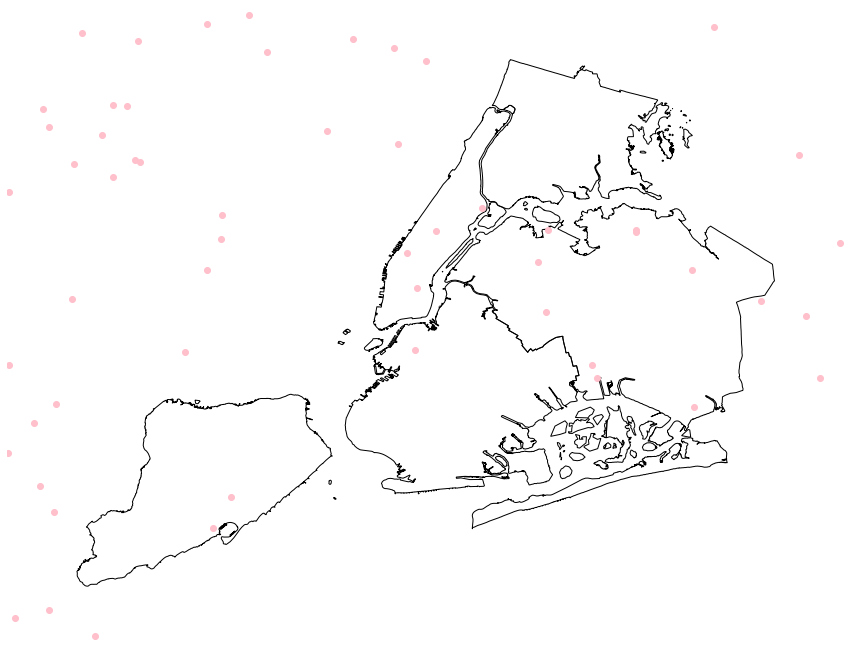

In [11]:
ax = geoplot.polyplot(boroughs, figsize=(15,15))
stations_geo.plot(color='pink', ax=ax)
plt.show()


In [12]:
np.floor(min(stations['LATITUDE']))

40.0

In [13]:
# I want some sort of baseline shape to slice into voronoi
min_lat = min(stations['LATITUDE'])
max_lat = max(stations['LATITUDE'])
min_lon = min(stations['LONGITUDE'])
max_lon = max(stations['LONGITUDE'])

weather_service_area = Polygon([[min_lon, min_lat],[min_lon,max_lat],[max_lon,max_lat],[max_lon, min_lat]])
weather_service_area = weather_service_area.buffer(0.02)
weather_service_geodf = gpd.GeoSeries(weather_service_area)

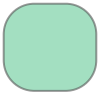

In [14]:
weather_service_area.buffer(1)

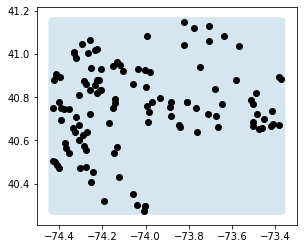

In [15]:
ax = weather_service_geodf.plot(alpha=0.18)
stations_geo.plot(color='black', ax=ax)
plt.show()

In [16]:
coords = np.array(list(zip(stations['LONGITUDE'],stations['LATITUDE'])))
coords[:4]

array([[-74.39635 ,  40.89174 ],
       [-74.42978 ,  40.50542 ],
       [-74.00151 ,  40.296952],
       [-74.37212 ,  40.58884 ]])

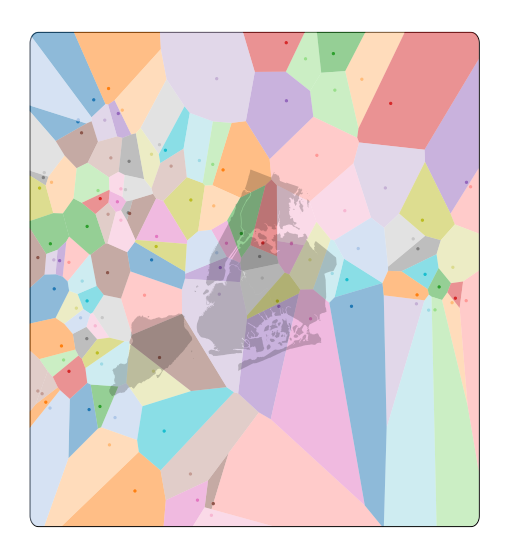

In [17]:
region_polys, region_pts = voronoi_regions_from_coords(coords, weather_service_area)

from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map(figsize=(10,10))
plot_voronoi_polys_with_points_in_area(ax, weather_service_area, region_polys, coords, region_pts)

boroughs.plot(ax=ax, alpha=0.2, color='black')
plt.show()

In [18]:
stations_geo = stations_geo.reset_index()
stations_geo

,index,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,geometry
0,0,USC00280907,"BOONTON 1 SE, NJ US",40.891740,-74.396350,85.3,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174)
1,364,US1NJMD0086,"HIGHLAND PARK 0.4 N, NJ US",40.505420,-74.429780,14.9,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.42978 40.50542)
2,719,US1NJMN0048,"LONG BRANCH 0.5 W, NJ US",40.296952,-74.001510,7.9,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.00151 40.29695)
3,1085,US1NJMD0088,"METUCHEN 3.3 N, NJ US",40.588840,-74.372120,27.4,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.37212 40.58884)
4,1418,US1NJPS0040,"POMPTON LAKES 1.0 ENE, NJ US",41.006785,-74.266384,89.0,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.26638 41.00679)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,30422,US1NJUN0003,"LINDEN 2.2 NW, NJ US",40.641210,-74.272595,19.8,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.27259 40.64121)
113,30743,US1NYNS0016,"MASSAPEQUA 0.9 SSW, NY US",40.655156,-73.475584,2.4,2020-03-13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.47558 40.65516)
114,30786,US1NYNS0018,"HICKSVILLE 1.3 ENE, NY US",40.768654,-73.501701,45.7,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.50170 40.76865)
115,31130,US1NYWC0019,"ELMSFORD 0.8 SSW, NY US",41.042666,-73.822799,90.5,2020-01-01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.82280 41.04267)


In [19]:
stations_geo['coverage_zone'] = gpd.geopandas.GeoSeries(region_polys)

<AxesSubplot:>

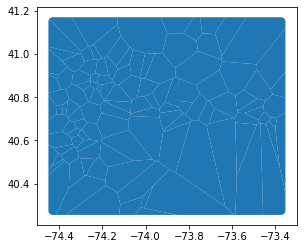

In [20]:
stations_geo.coverage_zone.plot()

In [21]:
pd.merge(weather_data, stations_geo, on="STATION", how="left")

,STATION,NAME_x,LATITUDE_x,LONGITUDE_x,ELEVATION_x,DATE_x,AWND_x,DAPR_x,MDPR_x,PGTM_x,...,WT02_y,WT03_y,WT04_y,WT05_y,WT06_y,WT08_y,WT09_y,WT11_y,geometry,coverage_zone
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."


In [22]:
weather_data.isnull()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11
0,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,True,True,True,True,True,True
31584,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,True,True,True,True,True,True
31585,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,True,True,True,True,True,True
31586,False,False,False,False,False,False,False,True,True,False,...,False,True,True,True,True,True,True,True,True,True


In [23]:
percent_missing = weather_data.isnull().sum() * 100 / len(weather_data)
percent_missing


STATION        0.000000
NAME           0.000000
LATITUDE       0.000000
LONGITUDE      0.000000
ELEVATION      0.000000
DATE           0.000000
AWND          90.854122
DAPR          99.056604
MDPR          99.066101
PGTM          95.365329
PRCP           1.275801
SNOW          52.500950
SNWD          78.083449
TAVG          96.523996
TMAX          83.829302
TMIN          83.803976
TOBS          93.323414
TSUN         100.000000
WDF2          90.847790
WDF5          90.879448
WESD          93.690642
WESF          93.313917
WSF2          90.847790
WSF5          90.879448
WT01          97.245790
WT02          99.791060
WT03          99.335191
WT04          99.908193
WT05          99.987337
WT06          99.990503
WT08          99.430163
WT09          99.981005
WT11          99.936685
dtype: float64

In [24]:
weather_data['month'] = weather_data['DATE'].dt.month
weather_data['year'] = weather_data['DATE'].dt.year

In [25]:
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,month,year
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2020


In [26]:
# pretty gross but need to handle these column names
nan_terms = [ 'WT0'+str(x) for x in np.array(range(9))+1 if x != 7 ]
nan_terms

['WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09']

In [27]:
# so all of these terms were reported as booleans if the phenomena exists
for term in nan_terms:
    weather_data[term] = weather_data[term].notna().astype(int)

In [28]:
weather_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,DAPR,MDPR,PGTM,...,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,month,year
0,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-01,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
1,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-02,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
2,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-03,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
3,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-04,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
4,USC00280907,"BOONTON 1 SE, NJ US",40.89174,-74.39635,85.3,2020-01-05,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,NaN,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-27,1.1,NaN,NaN,1334.0,...,0,0,0,0,0,0,0,NaN,12,2020
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-28,1.3,NaN,NaN,1215.0,...,0,0,0,0,0,0,0,NaN,12,2020
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-29,3.7,NaN,NaN,1039.0,...,0,0,0,0,0,0,0,NaN,12,2020
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",40.87645,-74.28284,52.0,2020-12-30,1.5,NaN,NaN,1455.0,...,0,0,0,0,0,0,0,NaN,12,2020


In [29]:
# let's just try and keep the average termperature, which seems to have the best 
weather_minmax = weather_data.dropna(subset=['TMAX','TMIN'])
weather_minmax = weather_minmax.drop(columns=['DAPR','MDPR','TSUN','WESD','WESF','WT11','LONGITUDE','LATITUDE','ELEVATION'])
weather_minmax

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,month,year
0,USC00280907,"BOONTON 1 SE, NJ US",2020-01-01,NaN,NaN,0.0,0.0,0.0,NaN,5.6,...,0,0,0,0,0,0,0,0,1,2020
1,USC00280907,"BOONTON 1 SE, NJ US",2020-01-02,NaN,NaN,0.0,0.0,0.0,NaN,2.8,...,0,0,0,0,0,0,0,0,1,2020
2,USC00280907,"BOONTON 1 SE, NJ US",2020-01-03,NaN,NaN,1.0,0.0,0.0,NaN,7.8,...,0,0,0,0,0,0,0,0,1,2020
3,USC00280907,"BOONTON 1 SE, NJ US",2020-01-04,NaN,NaN,10.7,0.0,0.0,NaN,7.8,...,0,0,0,0,0,0,0,0,1,2020
4,USC00280907,"BOONTON 1 SE, NJ US",2020-01-05,NaN,NaN,0.5,0.0,0.0,NaN,8.9,...,0,0,0,0,0,0,0,0,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31583,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",2020-12-27,1.1,1334.0,0.0,NaN,NaN,NaN,3.9,...,0,0,0,0,0,0,0,0,12,2020
31584,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",2020-12-28,1.3,1215.0,0.0,NaN,NaN,NaN,10.6,...,0,0,0,0,0,0,0,0,12,2020
31585,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",2020-12-29,3.7,1039.0,0.0,NaN,NaN,NaN,5.6,...,0,0,0,0,0,0,0,0,12,2020
31586,USW00054743,"CALDWELL ESSEX CO AIRPORT, NJ US",2020-12-30,1.5,1455.0,0.0,NaN,NaN,NaN,5.0,...,0,0,0,0,0,0,0,0,12,2020


In [30]:
weather_grouping = weather_minmax.groupby(['STATION','year','month']).mean()
weather_grouping

AWND  PGTM      PRCP      SNOW       SNWD  \
STATION     year month                                                  
USC00280907 2020 1           NaN   NaN  1.790323  0.433333   0.806452   
                 2           NaN   NaN  2.227586  0.000000   0.000000   
                 3           NaN   NaN  2.586667  0.000000   0.000000   
                 4           NaN   NaN  3.953571  0.000000   0.000000   
                 5           NaN   NaN  2.751613  0.000000   0.000000   
...                          ...   ...       ...       ...        ...   
USW00094789 2020 8      4.422581   NaN  2.309677  0.000000   0.000000   
                 9      4.413333   NaN  2.420000  0.000000   0.000000   
                 10     4.429032   NaN  4.080645  0.000000   0.000000   
                 11     5.193333   NaN  3.933333  0.000000   0.000000   
                 12     5.948387   NaN  2.896774  5.903226  29.677419   

                             TAVG       TMAX       TMIN       TOBS  \
STATION     year month                                               
USC00280907 2020 1            NaN   5.738710  -2.812903  -0.467742   
                 2            NaN   6.320690  -1.800000   0.268966   
                 3            NaN  11.416667   1.150000   3.330000   
                 4            NaN  13.303571   3.507143   5.710714   
                 5            NaN  20.232258   8.567742  10.883871   
...                           ...        ...        ...        ...   
USW00094789 2020 8      24.332258  28.367742  20.806452        NaN   
                 9      20.316667  24.360000  16.050000        NaN   
                 10     14.716129  18.261290  10.832258        NaN   
                 11     10.510000  15.200000   5.790000        NaN   
                 12      3.932258   7.041935   0.177419        NaN   

                              WDF2  ...       WSF2       WSF5      WT01  \
STATION     year month              ...                                   
USC00280907 2020 1             NaN  ...        NaN        NaN  0.000000   
                 2             NaN  ...        NaN        NaN  0.000000   
                 3             NaN  ...        NaN        NaN  0.000000   
                 4             NaN  ...        NaN        NaN  0.000000   
                 5             NaN  ...        NaN        NaN  0.000000   
...                            ...  ...        ...        ...       ...   
USW00094789 2020 8      186.129032  ...   9.870968  12.229032  0.483871   
                 9      162.000000  ...   8.403333  11.429630  0.366667   
                 10     191.290323  ...   8.596774  10.716129  0.483871   
                 11     239.666667  ...  10.560000  13.086667  0.466667   
                 12     260.967742  ...  11.041935  13.596774  0.387097   

                            WT02      WT03      WT04  WT05  WT06      WT08  \
STATION     year month                                                       
USC00280907 2020 1      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
                 2      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
                 3      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
                 4      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
                 5      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
...                          ...       ...       ...   ...   ...       ...   
USW00094789 2020 8      0.032258  0.354839  0.000000   0.0   0.0  0.258065   
                 9      0.000000  0.033333  0.000000   0.0   0.0  0.066667   
                 10     0.161290  0.000000  0.000000   0.0   0.0  0.064516   
                 11     0.066667  0.000000  0.000000   0.0   0.0  0.000000   
                 12     0.032258  0.000000  0.064516   0.0   0.0  0.096774   

                            WT09  
STATION     year month            
USC00280907 2020 1      0.000000  
                 2      0.000000  
                 3      0.000000  
 

In [31]:
weather_grouping.index.get_level_values(2)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='month', length=168)

In [32]:
weather_grouping.reset_index(level=['year','month'])

,year,month,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09
STATION,,,,,,,,,,,,,,,,,,,,,
USC00280907,2020,1,NaN,NaN,1.790323,0.433333,0.806452,NaN,5.738710,-2.812903,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
USC00280907,2020,2,NaN,NaN,2.227586,0.000000,0.000000,NaN,6.320690,-1.800000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
USC00280907,2020,3,NaN,NaN,2.586667,0.000000,0.000000,NaN,11.416667,1.150000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
USC00280907,2020,4,NaN,NaN,3.953571,0.000000,0.000000,NaN,13.303571,3.507143,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
USC00280907,2020,5,NaN,NaN,2.751613,0.000000,0.000000,NaN,20.232258,8.567742,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USW00094789,2020,8,4.422581,NaN,2.309677,0.000000,0.000000,24.332258,28.367742,20.806452,...,9.870968,12.229032,0.483871,0.032258,0.354839,0.000000,0.0,0.0,0.258065,0.000000
USW00094789,2020,9,4.413333,NaN,2.420000,0.000000,0.000000,20.316667,24.360000,16.050000,...,8.403333,11.429630,0.366667,0.000000,0.033333,0.000000,0.0,0.0,0.066667,0.000000
USW00094789,2020,10,4.429032,NaN,4.080645,0.000000,0.000000,14.716129,18.261290,10.832258,...,8.596774,10.716129,0.483871,0.161290,0.000000,0.000000,0.0,0.0,0.064516,0.000000


In [33]:
unique_stations = weather_minmax['STATION'].unique()
unique_stations

array(['USC00280907', 'USW00014732', 'USW00014734', 'USC00308577',
       'USW00094741', 'USW00094745', 'USC00281335', 'USW00054787',
       'USC00284987', 'USW00094789', 'USC00301309', 'USC00283704',
       'USW00094728', 'USW00054743'], dtype=object)

In [34]:
weather_data_monthly = weather_minmax.groupby(['STATION','year','month']).agg(lambda x: x.mean(skipna=True)).reset_index()

In [35]:
nyc_mean_monthly = weather_data_monthly.groupby('month').mean()

In [36]:
nyc_mean_monthly.isna().sum() * 100 / len(nyc_mean_monthly)

year    0.0
AWND    0.0
PGTM    0.0
PRCP    0.0
SNOW    0.0
SNWD    0.0
TAVG    0.0
TMAX    0.0
TMIN    0.0
TOBS    0.0
WDF2    0.0
WDF5    0.0
WSF2    0.0
WSF5    0.0
WT01    0.0
WT02    0.0
WT03    0.0
WT04    0.0
WT05    0.0
WT06    0.0
WT08    0.0
WT09    0.0
dtype: float64

In [37]:
# nyc_averages = nyc_mean_monthly.drop(columns=['DAPR','MDPR','TSUN','WESD','WESF','WT11','LONGITUDE','LATITUDE','year','ELEVATION'])
nyc_averages = nyc_mean_monthly

In [38]:
weather_grouping

AWND  PGTM      PRCP      SNOW       SNWD  \
STATION     year month                                                  
USC00280907 2020 1           NaN   NaN  1.790323  0.433333   0.806452   
                 2           NaN   NaN  2.227586  0.000000   0.000000   
                 3           NaN   NaN  2.586667  0.000000   0.000000   
                 4           NaN   NaN  3.953571  0.000000   0.000000   
                 5           NaN   NaN  2.751613  0.000000   0.000000   
...                          ...   ...       ...       ...        ...   
USW00094789 2020 8      4.422581   NaN  2.309677  0.000000   0.000000   
                 9      4.413333   NaN  2.420000  0.000000   0.000000   
                 10     4.429032   NaN  4.080645  0.000000   0.000000   
                 11     5.193333   NaN  3.933333  0.000000   0.000000   
                 12     5.948387   NaN  2.896774  5.903226  29.677419   

                             TAVG       TMAX       TMIN       TOBS  \
STATION     year month                                               
USC00280907 2020 1            NaN   5.738710  -2.812903  -0.467742   
                 2            NaN   6.320690  -1.800000   0.268966   
                 3            NaN  11.416667   1.150000   3.330000   
                 4            NaN  13.303571   3.507143   5.710714   
                 5            NaN  20.232258   8.567742  10.883871   
...                           ...        ...        ...        ...   
USW00094789 2020 8      24.332258  28.367742  20.806452        NaN   
                 9      20.316667  24.360000  16.050000        NaN   
                 10     14.716129  18.261290  10.832258        NaN   
                 11     10.510000  15.200000   5.790000        NaN   
                 12      3.932258   7.041935   0.177419        NaN   

                              WDF2  ...       WSF2       WSF5      WT01  \
STATION     year month              ...                                   
USC00280907 2020 1             NaN  ...        NaN        NaN  0.000000   
                 2             NaN  ...        NaN        NaN  0.000000   
                 3             NaN  ...        NaN        NaN  0.000000   
                 4             NaN  ...        NaN        NaN  0.000000   
                 5             NaN  ...        NaN        NaN  0.000000   
...                            ...  ...        ...        ...       ...   
USW00094789 2020 8      186.129032  ...   9.870968  12.229032  0.483871   
                 9      162.000000  ...   8.403333  11.429630  0.366667   
                 10     191.290323  ...   8.596774  10.716129  0.483871   
                 11     239.666667  ...  10.560000  13.086667  0.466667   
                 12     260.967742  ...  11.041935  13.596774  0.387097   

                            WT02      WT03      WT04  WT05  WT06      WT08  \
STATION     year month                                                       
USC00280907 2020 1      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
                 2      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
                 3      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
                 4      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
                 5      0.000000  0.000000  0.000000   0.0   0.0  0.000000   
...                          ...       ...       ...   ...   ...       ...   
USW00094789 2020 8      0.032258  0.354839  0.000000   0.0   0.0  0.258065   
                 9      0.000000  0.033333  0.000000   0.0   0.0  0.066667   
                 10     0.161290  0.000000  0.000000   0.0   0.0  0.064516   
                 11     0.066667  0.000000  0.000000   0.0   0.0  0.000000   
                 12     0.032258  0.000000  0.064516   0.0   0.0  0.096774   

                            WT09  
STATION     year month            
USC00280907 2020 1      0.000000  
                 2      0.000000  
                 3      0.000000  
 

In [39]:
stations = []
cleaned_data = []

for station, data in weather_grouping.groupby(level=0):
    stations.append(station)
    ind_stations = weather_grouping.xs(station, level=0)
    station_year = ind_stations.xs(2020, level=0)
    temp_arr = station_year.fillna(nyc_averages)
    temp_arr = temp_arr.reset_index()
    temp_arr['STATION'] = station
    temp_arr.index = temp_arr['STATION']
    cleaned_data.append(temp_arr)

In [40]:
cleaned_full_data = pd.concat(cleaned_data)
cleaned_full_data = cleaned_full_data.drop(columns=['STATION'])
cleaned_full_data = cleaned_full_data.reset_index()
cleaned_full_data['id'] = cleaned_full_data['STATION'] + '_' + cleaned_full_data['month'].map(str)

In [41]:
cleaned_full_data

,STATION,month,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,id
0,USC00280907,1,3.996371,1219.395161,1.790323,0.433333,0.806452,3.829032,5.738710,-2.812903,...,12.012885,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_1
1,USC00280907,2,3.795259,1281.620690,2.227586,0.000000,0.000000,4.212644,6.320690,-1.800000,...,11.618103,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_2
2,USC00280907,3,4.162204,1241.855108,2.586667,0.000000,0.000000,8.233333,11.416667,1.150000,...,12.255134,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_3
3,USC00280907,4,4.651667,1273.741667,3.953571,0.000000,0.000000,9.728889,13.303571,3.507143,...,13.475000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_4
4,USC00280907,5,3.942505,1376.717742,2.751613,0.000000,0.000000,15.274194,20.232258,8.567742,...,12.291864,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,USW00094789,8,4.422581,1395.104839,2.309677,0.000000,0.000000,24.332258,28.367742,20.806452,...,12.229032,0.483871,0.032258,0.354839,0.000000,0.0,0.0,0.258065,0.000000,USW00094789_8
164,USW00094789,9,4.413333,1279.467262,2.420000,0.000000,0.000000,20.316667,24.360000,16.050000,...,11.429630,0.366667,0.000000,0.033333,0.000000,0.0,0.0,0.066667,0.000000,USW00094789_9
165,USW00094789,10,4.429032,1226.596774,4.080645,0.000000,0.000000,14.716129,18.261290,10.832258,...,10.716129,0.483871,0.161290,0.000000,0.000000,0.0,0.0,0.064516,0.000000,USW00094789_10
166,USW00094789,11,5.193333,1343.433333,3.933333,0.000000,0.000000,10.510000,15.200000,5.790000,...,13.086667,0.466667,0.066667,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USW00094789_11


In [42]:
# woohoo! finally my data seems good
cleaned_full_data.isna().sum() * 100 / len(cleaned_full_data)

STATION    0.0
month      0.0
AWND       0.0
PGTM       0.0
PRCP       0.0
SNOW       0.0
SNWD       0.0
TAVG       0.0
TMAX       0.0
TMIN       0.0
TOBS       0.0
WDF2       0.0
WDF5       0.0
WSF2       0.0
WSF5       0.0
WT01       0.0
WT02       0.0
WT03       0.0
WT04       0.0
WT05       0.0
WT06       0.0
WT08       0.0
WT09       0.0
id         0.0
dtype: float64

In [43]:
stations_geo.columns

Index(['index', 'STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'DATE', 'AWND', 'DAPR', 'MDPR', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WDF2', 'WDF5', 'WESD', 'WESF', 'WSF2',
       'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09',
       'WT11', 'geometry', 'coverage_zone'],
      dtype='object')

In [44]:
stations_geo.isna().sum() * 100 / len(stations_geo)

index              0.000000
STATION            0.000000
NAME               0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
ELEVATION          0.000000
DATE               0.000000
AWND              93.162393
DAPR              95.726496
MDPR              95.726496
PGTM              96.581197
PRCP               6.837607
SNOW              60.683761
SNWD              76.923077
TAVG              97.435897
TMAX              88.034188
TMIN              88.034188
TOBS              95.726496
TSUN             100.000000
WDF2              93.162393
WDF5              93.162393
WESD              94.017094
WESF              94.017094
WSF2              93.162393
WSF5              93.162393
WT01             100.000000
WT02             100.000000
WT03             100.000000
WT04             100.000000
WT05             100.000000
WT06             100.000000
WT08             100.000000
WT09             100.000000
WT11             100.000000
geometry           0.000000
coverage_zone      0

In [45]:
# I want to intentionally leave out any polygons because I'm using the cleaned data to define them
stations_clean = stations_geo.loc[:,['STATION','NAME','geometry','ELEVATION']]
stations_clean

,STATION,NAME,geometry,ELEVATION
0,USC00280907,"BOONTON 1 SE, NJ US",POINT (-74.39635 40.89174),85.3
1,US1NJMD0086,"HIGHLAND PARK 0.4 N, NJ US",POINT (-74.42978 40.50542),14.9
2,US1NJMN0048,"LONG BRANCH 0.5 W, NJ US",POINT (-74.00151 40.29695),7.9
3,US1NJMD0088,"METUCHEN 3.3 N, NJ US",POINT (-74.37212 40.58884),27.4
4,US1NJPS0040,"POMPTON LAKES 1.0 ENE, NJ US",POINT (-74.26638 41.00679),89.0
...,...,...,...,...
112,US1NJUN0003,"LINDEN 2.2 NW, NJ US",POINT (-74.27259 40.64121),19.8
113,US1NYNS0016,"MASSAPEQUA 0.9 SSW, NY US",POINT (-73.47558 40.65516),2.4
114,US1NYNS0018,"HICKSVILLE 1.3 ENE, NY US",POINT (-73.50170 40.76865),45.7
115,US1NYWC0019,"ELMSFORD 0.8 SSW, NY US",POINT (-73.82280 41.04267),90.5


In [46]:
weather_data_monthly_geo = pd.merge(cleaned_full_data, stations_clean, on="STATION", how="left")
weather_data_monthly_geo

,STATION,month,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT03,WT04,WT05,WT06,WT08,WT09,id,NAME,geometry,ELEVATION
0,USC00280907,1,3.996371,1219.395161,1.790323,0.433333,0.806452,3.829032,5.738710,-2.812903,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_1,"BOONTON 1 SE, NJ US",POINT (-74.39635 40.89174),85.3
1,USC00280907,2,3.795259,1281.620690,2.227586,0.000000,0.000000,4.212644,6.320690,-1.800000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_2,"BOONTON 1 SE, NJ US",POINT (-74.39635 40.89174),85.3
2,USC00280907,3,4.162204,1241.855108,2.586667,0.000000,0.000000,8.233333,11.416667,1.150000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_3,"BOONTON 1 SE, NJ US",POINT (-74.39635 40.89174),85.3
3,USC00280907,4,4.651667,1273.741667,3.953571,0.000000,0.000000,9.728889,13.303571,3.507143,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_4,"BOONTON 1 SE, NJ US",POINT (-74.39635 40.89174),85.3
4,USC00280907,5,3.942505,1376.717742,2.751613,0.000000,0.000000,15.274194,20.232258,8.567742,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_5,"BOONTON 1 SE, NJ US",POINT (-74.39635 40.89174),85.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,USW00094789,8,4.422581,1395.104839,2.309677,0.000000,0.000000,24.332258,28.367742,20.806452,...,0.354839,0.000000,0.0,0.0,0.258065,0.000000,USW00094789_8,"JFK INTERNATIONAL AIRPORT, NY US",POINT (-73.76390 40.63915),2.7
164,USW00094789,9,4.413333,1279.467262,2.420000,0.000000,0.000000,20.316667,24.360000,16.050000,...,0.033333,0.000000,0.0,0.0,0.066667,0.000000,USW00094789_9,"JFK INTERNATIONAL AIRPORT, NY US",POINT (-73.76390 40.63915),2.7
165,USW00094789,10,4.429032,1226.596774,4.080645,0.000000,0.000000,14.716129,18.261290,10.832258,...,0.000000,0.000000,0.0,0.0,0.064516,0.000000,USW00094789_10,"JFK INTERNATIONAL AIRPORT, NY US",POINT (-73.76390 40.63915),2.7
166,USW00094789,11,5.193333,1343.433333,3.933333,0.000000,0.000000,10.510000,15.200000,5.790000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USW00094789_11,"JFK INTERNATIONAL AIRPORT, NY US",POINT (-73.76390 40.63915),2.7


In [47]:
unique_stations = weather_data_monthly_geo.drop_duplicates(subset='STATION').reset_index()
unique_stations = unique_stations.drop(columns='index')
unique_stations_location = gpd.GeoSeries(unique_stations.geometry)
cleaned_coords = np.array(list(zip(unique_stations_location.geometry.x, unique_stations_location.geometry.y)))
cleaned_coords[:5]

array([[-74.39635,  40.89174],
       [-74.3539 ,  40.7436 ],
       [-74.152  ,  40.7481 ],
       [-74.00153,  40.29696],
       [-73.37309,  40.88345]])

In [48]:
unique_stations[:3]

,STATION,month,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT03,WT04,WT05,WT06,WT08,WT09,id,NAME,geometry,ELEVATION
0,USC00280907,1,3.996371,1219.395161,1.790323,0.433333,0.806452,3.829032,5.738710,-2.812903,...,0.0,0.000000,0.0,0.000000,0.0,0.0,USC00280907_1,"BOONTON 1 SE, NJ US",POINT (-74.39635 40.89174),85.3
1,USC00281335,1,3.996371,1219.395161,1.803704,0.266667,0.000000,3.829032,7.116129,-1.864516,...,0.0,0.000000,0.0,0.000000,0.0,0.0,USC00281335_1,"CANOE BROOK, NJ US",POINT (-74.35390 40.74360),54.9
2,USC00283704,1,3.996371,1219.395161,1.816129,1.870968,1.612903,3.829032,7.161290,-0.893548,...,0.0,0.032258,0.0,0.032258,0.0,0.0,USC00283704_1,"HARRISON, NJ US",POINT (-74.15200 40.74810),7.3


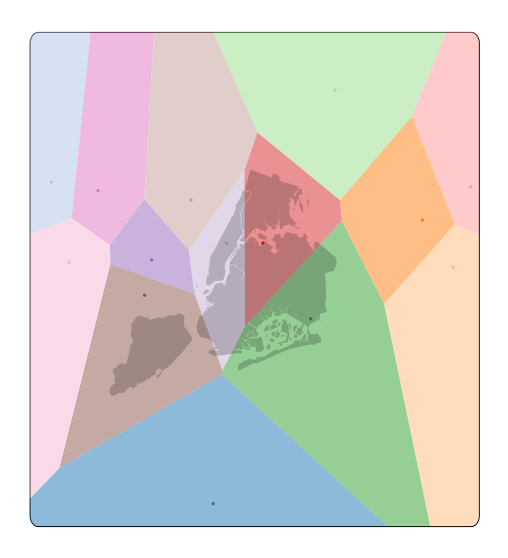

In [49]:
good_region_polys, good_region_pts = voronoi_regions_from_coords(cleaned_coords, weather_service_area)

from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map(figsize=(10,10))
plot_voronoi_polys_with_points_in_area(ax, weather_service_area, good_region_polys, cleaned_coords, good_region_pts)

boroughs.plot(ax=ax, alpha=0.2, color='black')
plt.show()

In [50]:
unique_stations['service_area'] = gpd.GeoSeries(good_region_polys)
unique_stations[:3]

,STATION,month,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT04,WT05,WT06,WT08,WT09,id,NAME,geometry,ELEVATION,service_area
0,USC00280907,1,3.996371,1219.395161,1.790323,0.433333,0.806452,3.829032,5.738710,-2.812903,...,0.000000,0.0,0.000000,0.0,0.0,USC00280907_1,"BOONTON 1 SE, NJ US",POINT (-74.39635 40.89174),85.3,"POLYGON ((-74.44978 40.30564, -74.37697 40.363..."
1,USC00281335,1,3.996371,1219.395161,1.803704,0.266667,0.000000,3.829032,7.116129,-1.864516,...,0.000000,0.0,0.000000,0.0,0.0,USC00281335_1,"CANOE BROOK, NJ US",POINT (-74.35390 40.74360),54.9,"POLYGON ((-74.41677 41.17012, -74.30107 41.170..."
2,USC00283704,1,3.996371,1219.395161,1.816129,1.870968,1.612903,3.829032,7.161290,-0.893548,...,0.032258,0.0,0.032258,0.0,0.0,USC00283704_1,"HARRISON, NJ US",POINT (-74.15200 40.74810),7.3,"POLYGON ((-73.41162 40.81385, -73.58450 40.666..."


<AxesSubplot:>

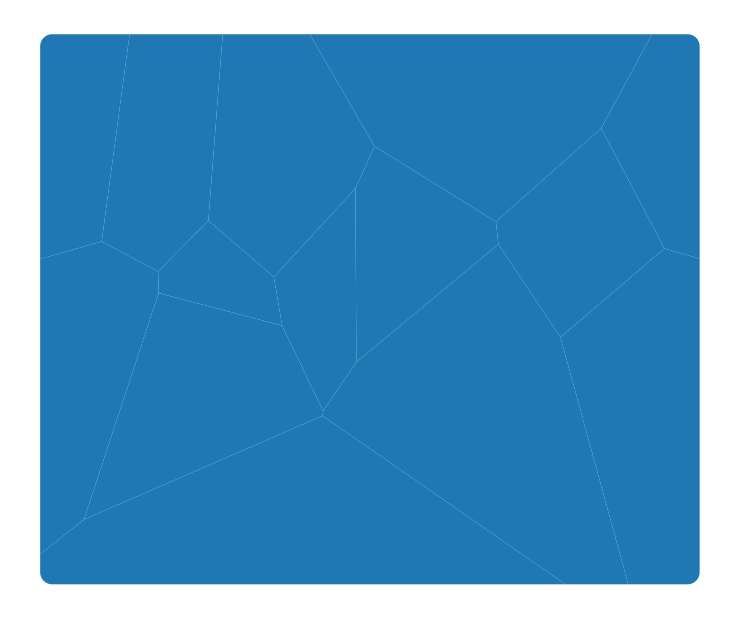

In [51]:
fig, ax = subplot_for_map(figsize=(13,13))

gpd.GeoSeries(unique_stations.service_area).plot(ax=ax)

In [52]:
stations_service_df = unique_stations.loc[:,['STATION','NAME','ELEVATION','geometry','service_area']]
stations_service_df[1:3]

,STATION,NAME,ELEVATION,geometry,service_area
1,USC00281335,"CANOE BROOK, NJ US",54.9,POINT (-74.35390 40.74360),"POLYGON ((-74.41677 41.17012, -74.30107 41.170..."
2,USC00283704,"HARRISON, NJ US",7.3,POINT (-74.15200 40.74810),"POLYGON ((-73.41162 40.81385, -73.58450 40.666..."


In [53]:
# temp_stations_area = stations_service_df.drop(columns='geometry').rename(columns={'service_area':'geometry'})

In [54]:
station_service_string = stations_service_df.to_csv()

from io import StringIO
stations_service_newdf = pd.read_csv(StringIO(station_service_string))

stations_service_newdf['geometry'] = gpd.GeoSeries.from_wkt(stations_service_newdf['geometry'])
stations_service_newdf['service_area'] = gpd.GeoSeries.from_wkt(stations_service_newdf['service_area'])

stations_service_newdf = stations_service_newdf.drop(columns=['Unnamed: 0','geometry'])

In [55]:
stations_geodataframe = gpd.GeoDataFrame(stations_service_newdf, geometry='service_area')

In [56]:
stations_geodataframe.to_file("./data/nyc/weather/monthly/station_service_area.geojson", driver='GeoJSON')

In [57]:
# from typing import Dict
# stations_service_df.to_json('./data/nyc/weather/monthly/station_service_area.geojson', default_handler=str)

In [58]:
cleaned_full_data[:3]

,STATION,month,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,id
0,USC00280907,1,3.996371,1219.395161,1.790323,0.433333,0.806452,3.829032,5.738710,-2.812903,...,12.012885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,USC00280907_1
1,USC00280907,2,3.795259,1281.620690,2.227586,0.000000,0.000000,4.212644,6.320690,-1.800000,...,11.618103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,USC00280907_2
2,USC00280907,3,4.162204,1241.855108,2.586667,0.000000,0.000000,8.233333,11.416667,1.150000,...,12.255134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,USC00280907_3


In [72]:
cleaned_full_data.columns

Index(['STATION', 'month', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'TOBS', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'id'],
      dtype='object')

In [76]:
cleaned_full_data.index = cleaned_full_data['id']

,STATION,month,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,id
0,USC00280907,1,3.996371,1219.395161,1.790323,0.433333,0.806452,3.829032,5.738710,-2.812903,...,12.012885,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_1
1,USC00280907,2,3.795259,1281.620690,2.227586,0.000000,0.000000,4.212644,6.320690,-1.800000,...,11.618103,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_2
2,USC00280907,3,4.162204,1241.855108,2.586667,0.000000,0.000000,8.233333,11.416667,1.150000,...,12.255134,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_3
3,USC00280907,4,4.651667,1273.741667,3.953571,0.000000,0.000000,9.728889,13.303571,3.507143,...,13.475000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_4
4,USC00280907,5,3.942505,1376.717742,2.751613,0.000000,0.000000,15.274194,20.232258,8.567742,...,12.291864,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,USW00094789,8,4.422581,1395.104839,2.309677,0.000000,0.000000,24.332258,28.367742,20.806452,...,12.229032,0.483871,0.032258,0.354839,0.000000,0.0,0.0,0.258065,0.000000,USW00094789_8
164,USW00094789,9,4.413333,1279.467262,2.420000,0.000000,0.000000,20.316667,24.360000,16.050000,...,11.429630,0.366667,0.000000,0.033333,0.000000,0.0,0.0,0.066667,0.000000,USW00094789_9
165,USW00094789,10,4.429032,1226.596774,4.080645,0.000000,0.000000,14.716129,18.261290,10.832258,...,10.716129,0.483871,0.161290,0.000000,0.000000,0.0,0.0,0.064516,0.000000,USW00094789_10
166,USW00094789,11,5.193333,1343.433333,3.933333,0.000000,0.000000,10.510000,15.200000,5.790000,...,13.086667,0.466667,0.066667,0.000000,0.000000,0.0,0.0,0.000000,0.000000,USW00094789_11


In [73]:
cleaned_full_data.to_csv('./data/nyc/weather/monthly/station_weather_permuted.csv')

In [60]:
pd.merge(cleaned_full_data, stations_service_df, on='STATION', how='left')

,STATION,month,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT04,WT05,WT06,WT08,WT09,id,NAME,ELEVATION,geometry,service_area
0,USC00280907,1,3.996371,1219.395161,1.790323,0.433333,0.806452,3.829032,5.738710,-2.812903,...,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_1,"BOONTON 1 SE, NJ US",85.3,POINT (-74.39635 40.89174),"POLYGON ((-74.44978 40.30564, -74.37697 40.363..."
1,USC00280907,2,3.795259,1281.620690,2.227586,0.000000,0.000000,4.212644,6.320690,-1.800000,...,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_2,"BOONTON 1 SE, NJ US",85.3,POINT (-74.39635 40.89174),"POLYGON ((-74.44978 40.30564, -74.37697 40.363..."
2,USC00280907,3,4.162204,1241.855108,2.586667,0.000000,0.000000,8.233333,11.416667,1.150000,...,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_3,"BOONTON 1 SE, NJ US",85.3,POINT (-74.39635 40.89174),"POLYGON ((-74.44978 40.30564, -74.37697 40.363..."
3,USC00280907,4,4.651667,1273.741667,3.953571,0.000000,0.000000,9.728889,13.303571,3.507143,...,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_4,"BOONTON 1 SE, NJ US",85.3,POINT (-74.39635 40.89174),"POLYGON ((-74.44978 40.30564, -74.37697 40.363..."
4,USC00280907,5,3.942505,1376.717742,2.751613,0.000000,0.000000,15.274194,20.232258,8.567742,...,0.000000,0.0,0.0,0.000000,0.000000,USC00280907_5,"BOONTON 1 SE, NJ US",85.3,POINT (-74.39635 40.89174),"POLYGON ((-74.44978 40.30564, -74.37697 40.363..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,USW00094789,8,4.422581,1395.104839,2.309677,0.000000,0.000000,24.332258,28.367742,20.806452,...,0.000000,0.0,0.0,0.258065,0.000000,USW00094789_8,"JFK INTERNATIONAL AIRPORT, NY US",2.7,POINT (-73.76390 40.63915),"POLYGON ((-74.44978 40.79628, -74.34748 40.825..."
164,USW00094789,9,4.413333,1279.467262,2.420000,0.000000,0.000000,20.316667,24.360000,16.050000,...,0.000000,0.0,0.0,0.066667,0.000000,USW00094789_9,"JFK INTERNATIONAL AIRPORT, NY US",2.7,POINT (-73.76390 40.63915),"POLYGON ((-74.44978 40.79628, -74.34748 40.825..."
165,USW00094789,10,4.429032,1226.596774,4.080645,0.000000,0.000000,14.716129,18.261290,10.832258,...,0.000000,0.0,0.0,0.064516,0.000000,USW00094789_10,"JFK INTERNATIONAL AIRPORT, NY US",2.7,POINT (-73.76390 40.63915),"POLYGON ((-74.44978 40.79628, -74.34748 40.825..."
166,USW00094789,11,5.193333,1343.433333,3.933333,0.000000,0.000000,10.510000,15.200000,5.790000,...,0.000000,0.0,0.0,0.000000,0.000000,USW00094789_11,"JFK INTERNATIONAL AIRPORT, NY US",2.7,POINT (-73.76390 40.63915),"POLYGON ((-74.44978 40.79628, -74.34748 40.825..."


In [61]:
weather_data_monthly_geo = pd.merge(cleaned_full_data, stations_clean, on="STATION", how="left")

In [62]:
print(weather_data_monthly_geo.iloc[0].to_string())

STATION                              USC00280907
month                                          1
AWND                                     3.99637
PGTM                                      1219.4
PRCP                                     1.79032
SNOW                                    0.433333
SNWD                                    0.806452
TAVG                                     3.82903
TMAX                                     5.73871
TMIN                                     -2.8129
TOBS                                   -0.467742
WDF2                                     246.721
WDF5                                     240.041
WSF2                                      8.7701
WSF5                                     12.0129
WT01                                           0
WT02                                           0
WT03                                           0
WT04                                           0
WT05                                           0
WT06                

In [63]:
weather_data_monthly_geo_servicearea = weather_data_monthly_geo.drop_duplicates(subset='STATION')

In [64]:
# ax = geoplot.polyplot(boroughs, figsize=(15,15))
# gpd.GeoSeries(weather_data_monthly_geo_servicearea.coverage_zone).plot(ax=ax)

In [65]:
list(weather_data_monthly_geo_servicearea['STATION'])

['USC00280907',
 'USC00281335',
 'USC00283704',
 'USC00284987',
 'USC00301309',
 'USC00308577',
 'USW00014732',
 'USW00014734',
 'USW00054743',
 'USW00054787',
 'USW00094728',
 'USW00094741',
 'USW00094745',
 'USW00094789']

In [66]:
# well, that kind of sucks, the weather data isn't good.
# so I'm going to filter for the stations which give reasonable data and repeat the
# voronoi diagram with them

# here's the stations which gave decent data
weather_data_monthly_geo_servicearea['NAME']

0                              BOONTON 1 SE, NJ US
12                              CANOE BROOK, NJ US
24                                 HARRISON, NJ US
36                     LONG BRANCH OAKHURST, NJ US
48                               CENTERPORT, NY US
60                                  SYOSSET, NY US
72                        LAGUARDIA AIRPORT, NY US
84     NEWARK LIBERTY INTERNATIONAL AIRPORT, NJ US
96                CALDWELL ESSEX CO AIRPORT, NJ US
108            FARMINGDALE REPUBLIC AIRPORT, NY US
120                    NY CITY CENTRAL PARK, NY US
132                       TETERBORO AIRPORT, NJ US
144                  WESTCHESTER CO AIRPORT, NY US
156               JFK INTERNATIONAL AIRPORT, NY US
Name: NAME, dtype: object

In [68]:
# good_coords = np.array(list(zip(weather_data_monthly_geo_servicearea['LONGITUDE_x'], weather_data_monthly_geo_servicearea['LATITUDE_x'])))
# good_coords

In [69]:
## well all is not lost, we still at least have this reasonable temperature data for these 
## regions, which have decent reporting.

## and it seems like all of the data points will fall within one of four buckets, which is nice

In [70]:
# good_region_polys, good_region_pts = voronoi_regions_from_coords(good_coords, weather_service_area)

# from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

# fig, ax = subplot_for_map(figsize=(10,10))
# plot_voronoi_polys_with_points_in_area(ax, weather_service_area, good_region_polys, good_coords, good_region_pts)

# boroughs.plot(ax=ax, alpha=0.2, color='black')
# plt.show()

NameError: name 'good_coords' is not defined

In [ ]:
good_monthly_weather = weather_data_monthly_geo_servicearea.reset_index()

In [ ]:
good_monthly_weather_subset = good_monthly_weather.loc[:,['STATION','geometry','coverage_zone']]

In [ ]:
good_monthly_weather['coverage_zone'] = gpd.geopandas.GeoSeries(good_region_polys)

In [ ]:
good_monthly_weather_subset

,STATION,geometry,coverage_zone
0,USC00280907,POINT (-74.39635 40.89174),"POLYGON ((-74.38615 40.96816, -74.44978 41.023..."
1,USC00281335,POINT (-74.35390 40.74360),"POLYGON ((-73.45128 40.73299, -73.45621 40.758..."
2,USC00283704,POINT (-74.15200 40.74810),"POLYGON ((-73.92188 41.00494, -73.90000 41.096..."
3,USC00284987,POINT (-74.00153 40.29696),"POLYGON ((-73.81574 40.72106, -73.78919 40.693..."
4,USC00301309,POINT (-73.37309 40.88345),"POLYGON ((-74.07160 41.03240, -74.11542 41.082..."
5,USC00308577,POINT (-73.49080 40.82160),"POLYGON ((-74.44978 40.91349, -74.40368 40.902..."
6,USW00014732,POINT (-73.88027 40.77945),"POLYGON ((-73.90000 41.09604, -73.92906 41.170..."
7,USW00014734,POINT (-74.16927 40.68275),"POLYGON ((-73.48565 40.67330, -73.58517 40.682..."
8,USW00054743,POINT (-74.28284 40.87645),"POLYGON ((-74.19114 40.78460, -74.19301 40.781..."
9,USW00054787,POINT (-73.41637 40.73443),"POLYGON ((-74.36911 40.71704, -74.36016 40.782..."


In [ ]:
w1 = weather_data_monthly_geo.drop(columns=['geometry','coverage_zone'])
w1

,STATION,year,month,LATITUDE_x,LONGITUDE_x,ELEVATION_x,DATE_x,AWND_x,DAPR_x,MDPR_x,...,WSF5_y,WT01_y,WT02_y,WT03_y,WT04_y,WT05_y,WT06_y,WT08_y,WT09_y,WT11_y
0,USC00280907,2020,1,40.89174,-74.39635,85.3,2020-01-16 00:00:00.000000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00280907,2020,2,40.89174,-74.39635,85.3,2020-02-15 00:00:00.000000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00280907,2020,3,40.89174,-74.39635,85.3,2020-03-15 19:12:00.000000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00280907,2020,4,40.89174,-74.39635,85.3,2020-04-15 01:42:51.428571392,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00280907,2020,5,40.89174,-74.39635,85.3,2020-05-16 00:00:00.000000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,USW00094789,2020,8,40.63915,-73.76390,2.7,2020-08-16 00:00:00.000000000,4.422581,NaN,NaN,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,USW00094789,2020,9,40.63915,-73.76390,2.7,2020-09-15 12:00:00.000000000,4.413333,NaN,NaN,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,USW00094789,2020,10,40.63915,-73.76390,2.7,2020-10-16 00:00:00.000000000,4.429032,NaN,NaN,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,USW00094789,2020,11,40.63915,-73.76390,2.7,2020-11-15 12:00:00.000000000,5.193333,NaN,NaN,...,17.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
w2 = w1.loc[:,~w1.columns.str.endswith('_y')]


In [ ]:
good_monthly_data = pd.merge(w2, good_monthly_weather_subset, on='STATION', how='left')

In [ ]:
good_monthly_data.groupby('STATION').mean()

,year,month,LATITUDE_x,LONGITUDE_x,ELEVATION_x,AWND_x,DAPR_x,MDPR_x,PGTM_x,PRCP_x,...,WT01_x,WT02_x,WT03_x,WT04_x,WT05_x,WT06_x,WT08_x,WT09_x,WT11_x,index
STATION,,,,,,,,,,,,,,,,,,,,,
USC00280907,2020.0,6.5,40.89174,-74.39635,85.3,NaN,NaN,NaN,NaN,3.284138,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.0
USC00281335,2020.0,6.5,40.74360,-74.35390,54.9,NaN,2.685185,9.633333,NaN,3.035810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,10650.0
USC00283704,2020.0,6.5,40.74810,-74.15200,7.3,NaN,NaN,NaN,NaN,3.864566,...,0.287356,0.000000,0.068011,0.016219,0.002688,0.002688,0.000000,0.000000,1.0,29290.0
USC00284987,2020.0,6.5,40.29696,-74.00153,9.1,NaN,NaN,NaN,NaN,3.592083,...,0.074781,0.000000,0.065508,0.002688,0.002778,0.000000,0.000000,0.000000,1.0,15851.0
USC00301309,2020.0,6.5,40.88345,-73.37309,9.1,NaN,NaN,NaN,NaN,3.056465,...,0.311908,0.000000,0.043548,0.008065,0.002778,0.002688,0.000000,0.000000,1.0,25541.0
USC00308577,2020.0,6.5,40.82160,-73.49080,80.8,NaN,NaN,NaN,NaN,3.137338,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,4390.0
USW00014732,2020.0,6.5,40.77945,-73.88027,3.0,4.712350,NaN,NaN,NaN,2.913151,...,0.276597,0.032629,0.089606,0.013530,0.000000,0.000000,0.144098,0.005376,NaN,1869.0
USW00014734,2020.0,6.5,40.68275,-74.16927,1.9,4.178526,NaN,NaN,NaN,3.266842,...,0.380200,0.029845,0.111649,0.019092,0.000000,0.002688,0.098239,0.005376,NaN,2776.0
USW00054743,2020.0,6.5,40.87645,-74.28284,52.0,2.173386,NaN,NaN,1312.677623,2.970329,...,0.048931,0.000000,0.002778,0.000000,0.000000,0.000000,0.016219,0.000000,NaN,31222.0


In [ ]:
good_monthly_data.describe()

,year,month,LATITUDE_x,LONGITUDE_x,ELEVATION_x,AWND_x,DAPR_x,MDPR_x,PGTM_x,PRCP_x,...,WT01_x,WT02_x,WT03_x,WT04_x,WT05_x,WT06_x,WT08_x,WT09_x,WT11_x,index
count,168.0,168.000000,168.000000,168.000000,168.000000,96.000000,9.000000,9.000000,48.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,14.0,168.000000
mean,2020.0,6.500000,40.771286,-73.929305,34.664286,3.633655,2.685185,9.633333,1310.062818,3.104397,...,0.170013,0.012803,0.040797,0.005607,0.000787,0.000576,0.034971,0.001152,1.0,14337.357143
std,0.0,3.462373,0.166579,0.328144,35.993165,1.142095,0.966252,4.874423,90.250476,1.319630,...,0.172814,0.034134,0.089557,0.014195,0.005056,0.004285,0.060343,0.007809,0.0,11055.446683
min,2020.0,1.000000,40.296960,-74.396350,0.800000,1.275000,2.000000,1.300000,1086.033333,0.936667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,2020.0,3.750000,40.734430,-74.169270,3.000000,2.789086,2.000000,7.000000,1261.088710,2.046290,...,0.024194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4390.000000
50%,2020.0,6.500000,40.779215,-73.985390,15.950000,3.643664,2.500000,9.900000,1299.616667,3.083871,...,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,11962.000000
75%,2020.0,9.250000,40.876450,-73.704540,54.900000,4.424194,3.000000,11.600000,1375.733871,3.830968,...,0.338710,0.000000,0.032258,0.000000,0.000000,0.000000,0.041991,0.000000,1.0,25541.000000
max,2020.0,12.000000,41.062360,-73.373090,112.900000,6.423333,5.000000,17.100000,1473.700000,9.193548,...,0.517241,0.225806,0.387097,0.064516,0.033333,0.032258,0.258065,0.064516,1.0,31222.000000


In [ ]:
good_monthly_data.isnull().sum() * 100 / len(good_monthly_data)


STATION            0.000000
year               0.000000
month              0.000000
LATITUDE_x         0.000000
LONGITUDE_x        0.000000
ELEVATION_x        0.000000
DATE_x             0.000000
AWND_x            42.857143
DAPR_x            94.642857
MDPR_x            94.642857
PGTM_x            71.428571
PRCP_x             0.000000
SNOW_x            27.976190
SNWD_x            27.976190
TAVG_x            78.571429
TMAX_x             0.000000
TMIN_x             0.000000
TOBS_x            57.142857
TSUN_x           100.000000
WDF2_x            42.857143
WDF5_x            42.857143
WESD_x            97.023810
WESF_x            96.428571
WSF2_x            42.857143
WSF5_x            42.857143
WT01_x             0.000000
WT02_x             0.000000
WT03_x             0.000000
WT04_x             0.000000
WT05_x             0.000000
WT06_x             0.000000
WT08_x             0.000000
WT09_x             0.000000
WT11_x            91.666667
index              0.000000
NAME               0